In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Visualización.
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

## 1. Dataset

El conjunto de datos CIRCLES consiste en puntos en un plano que forman dos círculos, de aquí el nombre de "circles". Cada círculo corresponde a un grupo diferente [0, 1].

El siguiente código generará 1.000 puntos y hace un gràfico para visualizar los dos círculos (con colores diferentes para cada grupo). 

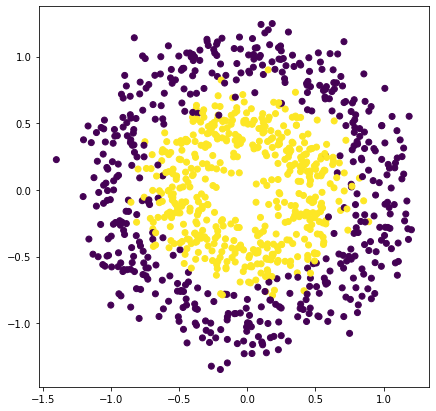

In [8]:
df = datasets.make_circles(n_samples=1000, factor=.5, noise=.15, random_state=42)
df_x = [x[0] for x in df[0]]
df_y = [x[1] for x in df[0]]
df_group = df[1]

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_x, df_y, c=df_group, label = "sa")

Antes de aplicar ningún modelo, tenemos que separar los datos entre el conjunto de *train* y de *test*. Siempre trabajaremos sobre el conjunto de *train* y evaluaremos los resultados en *test*.

In [11]:
random_state = 24

X_train, X_test, y_train, y_test = train_test_split(df[0], df[1], random_state=random_state, test_size = 0.2)

A lo largo del ejercicio aprenderemos a ver gráficamente las fronteras de decisión que nos devuelven los diferentes modelos. Para ello utilizaremos la función definida a continuación, que sigue los siguientes pasos:

   - Crear una _meshgrid_ con los valores mínimo y máximo de 'x' e 'y'.
   - Predecir el clasificador con los valores de la _meshgrid_.
   - Hacer un _reshape_ de los datos para tener el formato correspondiente.
  
Una vez hecho esto, ya podemos hacer el gráfico de las fronteras de decisión y añadir los puntos reales. Así veremos las áreas que el modelo considera que son de una clase y las que considera que son de otra. Al poner encima los puntos veremos si los clasifica correctamente en el área que les corresponde. También veremos las areas de indecisión, casos en los que el modelo no se inclina ni hacia una clase ni hacia otra (o si que se inclina pero no lo tiene 100% claro), estas seran blanquinosas.

In [12]:
# Vamos a crear la meshgrid con los valores mínimos y máximos de los ejes x e y
x_min, x_max = min(df_x)-0.1, max(df_x)+0.1
y_min, y_max = min(df_y)-0.1, max(df_y)+0.1 

def plot_decision_boundaries(x, y, labels, model, 
                             x_min=x_min, 
                             x_max=x_max, 
                             y_min=y_min, 
                             y_max=y_max, 
                             grid_step=0.02):
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    
    # Precedimos con el clasificador con los valores de la meshgrid
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    # Hacemos reshape para tener el formato correcto.
    Z = Z.reshape(xx.shape)

    # Seleccionamos una paleta de color.
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv) 
    my_cmap = ListedColormap(arr)
    
    # Dibujamos las fronteras de decisión.
    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap, shading='auto')

    # Añadimos los puntos.
    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)

### 1.1. Gaussian Naïve Bayes

El objetivo de este primer ejercicio es entender el funcionamiento del algoritmo Naïve-Bayes, un algoritmo peculiar ya que se basa completamente en teoría de probabilidades.

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score


guass_model = GaussianNB()
guass_model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = guass_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[96,  3],
       [ 5, 96]], dtype=int64)

La matriz de confusión se divide en 4 secciones:

* Verdaderos positivos (TP): 96 registros con la categoría 1 que han sido predichos de forma correcta.
* Falsos positivos (FP): 3 registros con la categoría 1 que no han sido predichos de forma incorrecta.
* Falso negativo (FN): 5 registros con la categoría 0 que no han sido predichos de forma incorrecta.
* Verdadero negativo (TN): 96 registros con la categoría 0 que han sido predichos de forma correcta.

Una forma para obtener la precisión del modelo es, sumar los verdaderos positivos con los verdaderos negativos y dividirlos para el número total de registros, como se muestra a continuación:

$$
precisión = \frac{Verdaderos~Positivos + Verdadero~Negativo}{Total~Registros } = \frac{96 + 96}{200} = 0.96
$$

Utilizando la función `accuracy_score` obtenemos el mismo resultado de la precision del modelo.

In [15]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.96

El modelo tiene una precision del 96%.

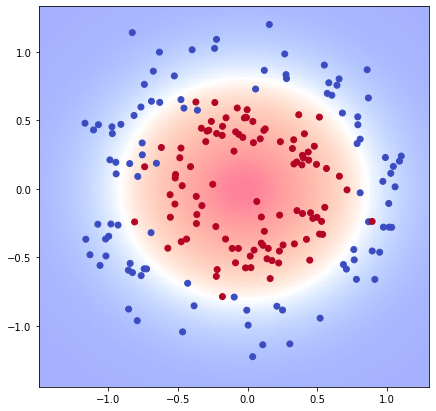

In [16]:
plot_decision_boundaries(X_test[:, 0], X_test[:, 1], y_test, guass_model, 
                             x_min=x_min, 
                             x_max=x_max, 
                             y_min=y_min, 
                             y_max=y_max, 
                             grid_step=0.02)

**¿Cómo son las fronteras de decisión?**

Las fronteras de decisión nos permiten visualizar la manera que los algoritmos de machine Learning etiquetan o clasifican los registros. En este caso se analizará el modelo Naïve Bayes con el grafico de fronteras de decisión.
Mientras más rojo sea el área, más alta es la probabilidad de que un registro sea clasificado por el modelo como clase 1. A medida que el color rojo se va difuminando, disminuye la probabilidad que un registro no sea categorizado a la clase 1. El área de color blanco pertenece el área de indecisión, debido a que el modelo calcula una probabilidad del 50% de pertenecer a la clase `1`. A continuación, se muestra el gráfico de frontera de decisión con las probabilidades calculadas por el modelo:

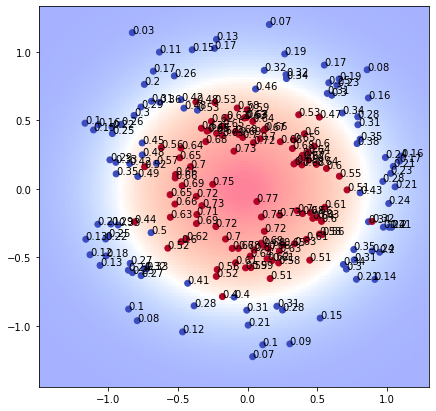

In [17]:
plot_decision_boundaries(X_test[:, 0], X_test[:, 1], y_test, guass_model, 
                             x_min=x_min, 
                             x_max=x_max, 
                             y_min=y_min, 
                             y_max=y_max, 
                             grid_step=0.02)

proba = guass_model.predict_proba(X_test)[:,1]
for x, y, prob in zip(X_test[:, 0], X_test[:, 1], proba):
    plt.text(x,y, round(prob, 2))

También, se observa que el color rojo no es intenso debido a que la probabilidad máxima calculada por el modelo no es 1, sino que es de 0.77 en el punto [0, 0].

**¿Cómo son las predicciones obtenidas sobre el conjunto de test?**

El modelo calcular una probabilidad alta de pertenecer a la clase `1` cuando el registro está cerca del centro. Como se muestra a continuación:

In [19]:
print('El registro [0 ,0] es clasificado {}, con una probabilidad del {}.'.format(
int(guass_model.predict([[0,0]])), float(guass_model.predict_proba([[0,0]])[:,1])))

El registro [0 ,0] es clasificado 1, con una probabilidad del 0.772328334293344.


Cuando x e y tienen valores menores a 0.50 son considerados clase 1 por el modelo, caso contrario serán clasificados como clase 0.

In [20]:
print('El registro [0 ,0] es clasificado {}, con una probabilidad del {}.'.format(
int(guass_model.predict([[0.49,0.49]])), float(guass_model.predict_proba([[0.49,0.49]])[:,1])))

El registro [0 ,0] es clasificado 1, con una probabilidad del 0.5065071707372402.
